# Time Series Clustering with K-Means and Euclidean Distance Matrix for total (n2)


This notebook provides a base clustering for ordinary and scripted trips together without feature engineering and K-Means with k=3. k=3 follows the naive assumption that the cluster structure is only influenced by the labels. 

We found that there are the following problems with this base line approach:
- Mode "METRO" and "TRAM" are not clustered distinctly
- Mode "WALK" has too many clusters
- We have to cut more than 30 seconds from the scripted trips during preprocessing

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv
import numpy as np
import pandas as pd
#Visualisation Libraries
%matplotlib inline
# Uncomment if you want interactive 3D plots --> does not work in the github rendering
#%matplotlib notebook
from copy import deepcopy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
from visualization.visualize import plot_timeseries_clustering
from visualization.visualize import get_plot_timeseries_clustering_variables
%aimport data.preprocessing
from data.preprocessing import Preprocessor
%aimport data.download
from data.download import DatasetDownloader
%aimport utils.utilities
from utils.utilities import get_cluster_labels

%aimport models.cluster
from models.cluster import get_clustering_performance

In [2]:
data_dir = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()))
file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")
dfs = Preprocessor.restore_preprocessed_data_from_disk(file_path)

In [3]:
trips_cut_per_30_sec = Preprocessor.get_cut_trip_snippets_for_total(dfs)
euclidean_distances = Preprocessor.calculate_distance_for_n2(trips_cut_per_30_sec, metric="euclidean")


In [4]:
print(euclidean_distances.shape)
euclidean_distances.head(5)

(1712, 1717)


,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1707,distance_1708,distance_1709,distance_1710,distance_1711,mode,notes,scripted,token,trip_id
0,0.000000,5.585873,8.327530,6.454059,8.517895,9.569294,7.855236,11.445291,9.981629,9.923413,...,16.104549,16.016583,17.506726,15.478482,18.506757,METRO,scripted,1,355007075245007,0
1,5.585873,0.000000,5.667661,3.008441,4.486533,6.834755,4.096321,8.085949,6.284251,6.156602,...,12.843057,12.645933,14.279733,11.958221,15.613433,METRO,scripted,1,355007075245007,0
2,8.327530,5.667661,0.000000,4.872560,5.631221,6.479848,4.445423,7.312812,5.685297,5.485712,...,11.520152,11.185817,13.323927,10.510455,14.395665,METRO,scripted,1,355007075245007,0
3,6.454059,3.008441,4.872560,0.000000,3.731448,5.867117,2.854994,6.874077,4.879990,4.807815,...,11.440539,11.329202,13.152727,10.583705,14.499833,METRO,scripted,1,355007075245007,0
4,8.517895,4.486533,5.631221,3.731448,0.000000,5.729284,2.530356,5.247481,3.458420,3.150586,...,9.599138,9.072764,11.342167,8.405892,13.006277,METRO,scripted,1,355007075245007,0


In [5]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_only = euclidean_distances.drop(categorical_columns,axis=1)
print(trips_only.shape)
trips_only.head(5)

(1712, 1712)


,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1702,distance_1703,distance_1704,distance_1705,distance_1706,distance_1707,distance_1708,distance_1709,distance_1710,distance_1711
0,0.000000,5.585873,8.327530,6.454059,8.517895,9.569294,7.855236,11.445291,9.981629,9.923413,...,16.283378,16.169008,15.642903,16.224674,15.775174,16.104549,16.016583,17.506726,15.478482,18.506757
1,5.585873,0.000000,5.667661,3.008441,4.486533,6.834755,4.096321,8.085949,6.284251,6.156602,...,13.005392,12.944297,12.349829,12.891138,12.356438,12.843057,12.645933,14.279733,11.958221,15.613433
2,8.327530,5.667661,0.000000,4.872560,5.631221,6.479848,4.445423,7.312812,5.685297,5.485712,...,11.681348,11.347430,10.890142,11.736922,10.767831,11.520152,11.185817,13.323927,10.510455,14.395665
3,6.454059,3.008441,4.872560,0.000000,3.731448,5.867117,2.854994,6.874077,4.879990,4.807815,...,11.707410,11.550528,11.118704,11.719789,10.969456,11.440539,11.329202,13.152727,10.583705,14.499833
4,8.517895,4.486533,5.631221,3.731448,0.000000,5.729284,2.530356,5.247481,3.458420,3.150586,...,9.698883,9.694812,9.214701,9.880100,9.130528,9.599138,9.072764,11.342167,8.405892,13.006277


------
## Create Base Model with Euclidean Distance and K-Means Clustering

In [6]:
from sklearn.cluster import KMeans
random_state = 0

#Naive asumption of 3 clusters due to 3 labels Walk, Metro and Tram 
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(trips_only)
cluster_labels = kmeans.labels_
euclidean_distances["cluster_labels"]=cluster_labels

### Summary Statistics for KMeans Clustering:

Here the performance is evaluated in regard to the "true labels" which here corresponds to the transport mode.

In [7]:
# how well does it capture the label information

get_clustering_performance(trips_only, cluster_labels,
                           true_labels=euclidean_distances["mode"])

['True number of clusters: 3',
 'Estimated number of clusters: 3',
 'Homogeneity: 0.540',
 'Completeness: 0.444',
 'V-measure: 0.488',
 'Silhouette Coefficient: 0.727']

In [8]:
# Uncomment if you want to explore full dataframe
#with pd.option_context('display.max_rows', None):
#    display(scripted_trips[scripted_trips["scripted"]==0])

## Visualise clustering result for one specific trip

Select one trip:

In [9]:
selected_trip = 51
small_df_trip = euclidean_distances[euclidean_distances.trip_id == selected_trip]
small_df_trip.head()

,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1708,distance_1709,distance_1710,distance_1711,mode,notes,scripted,token,trip_id,cluster_labels
1261,85.849545,84.735107,84.306678,84.321991,83.605662,84.125497,83.919646,83.168323,83.587320,83.383134,...,82.320175,82.647078,82.197771,82.342312,WALK,ordinary hoferanduni,0,868049020858898,51,2
1262,114.362285,113.327499,112.821326,112.727161,111.808791,111.949744,112.042401,110.751371,111.261856,111.295915,...,109.527688,109.786409,109.652634,110.269307,WALK,ordinary hoferanduni,0,868049020858898,51,0
1263,136.586418,135.186435,134.525274,134.764881,133.751038,133.682166,133.909231,132.715806,133.072885,133.052815,...,130.904407,130.097623,131.087143,131.184449,WALK,ordinary hoferanduni,0,868049020858898,51,0
1264,157.552328,155.899697,154.766419,155.388934,154.363122,153.923884,154.444566,153.178385,153.705754,153.564165,...,151.783560,152.390549,151.616092,150.642925,WALK,ordinary hoferanduni,0,868049020858898,51,0
1265,145.942712,144.990988,144.033567,144.491068,143.653747,143.641165,143.675195,142.755449,142.927016,142.954108,...,141.182222,140.307645,141.103769,142.911228,WALK,ordinary hoferanduni,0,868049020858898,51,0


First, make sure that cut trips and original trips are the same by checking the first values in the total column

In [10]:
trips_cut_per_30_sec[trips_cut_per_30_sec.trip_id == selected_trip].head(1)

,snippet_0,snippet_1,snippet_2,snippet_3,snippet_4,snippet_5,snippet_6,snippet_7,snippet_8,snippet_9,...,snippet_595,snippet_596,snippet_597,snippet_598,snippet_599,mode,notes,scripted,token,trip_id
1261,8.69345,8.81153,8.86198,8.49275,8.23892,8.63844,7.91614,9.99795,10.8403,12.432,...,10.8277,8.62898,5.54272,3.62859,4.31096,WALK,ordinary hoferanduni,0,868049020858898,51


In [11]:
trips_unpacked = Preprocessor.unpack_all_trips(dfs)
acceleration_data_trip = trips_unpacked[selected_trip]["sensor"]
acceleration_data_trip = deepcopy(acceleration_data_trip[acceleration_data_trip.sensor == "acceleration"])
# Important, because indices are not unique
acceleration_data_trip = acceleration_data_trip.reset_index(drop=True)

acceleration_data_trip.head()

,time,total,x,y,z,sensor
0,2017-12-06 11:46:29.815,8.693447,-0.548078,1.629004,8.521853,acceleration
1,2017-12-06 11:46:29.860,8.811531,0.131337,1.341359,8.707846,acceleration
2,2017-12-06 11:46:29.910,8.861978,0.446902,1.679908,8.689813,acceleration
3,2017-12-06 11:46:29.960,8.492753,0.406448,1.917852,8.263383,acceleration
4,2017-12-06 11:46:30.010,8.238921,0.170085,2.056487,7.976325,acceleration


During the cutting process the last segments which are less than 30 seconds are dropped, thats why we have to drop them in the original dataframe as well:

In [12]:
labels = get_cluster_labels(small_df_trip["cluster_labels"])
diff = acceleration_data_trip.shape[0] - len(labels)
rows_to_be_dropped = acceleration_data_trip.tail(diff).index
acceleration_data_trip = acceleration_data_trip.drop(rows_to_be_dropped)
acceleration_data_trip["cluster_labels"]= labels
acceleration_data_trip.head()

,time,total,x,y,z,sensor,cluster_labels
0,2017-12-06 11:46:29.815,8.693447,-0.548078,1.629004,8.521853,acceleration,2
1,2017-12-06 11:46:29.860,8.811531,0.131337,1.341359,8.707846,acceleration,2
2,2017-12-06 11:46:29.910,8.861978,0.446902,1.679908,8.689813,acceleration,2
3,2017-12-06 11:46:29.960,8.492753,0.406448,1.917852,8.263383,acceleration,2
4,2017-12-06 11:46:30.010,8.238921,0.170085,2.056487,7.976325,acceleration,2


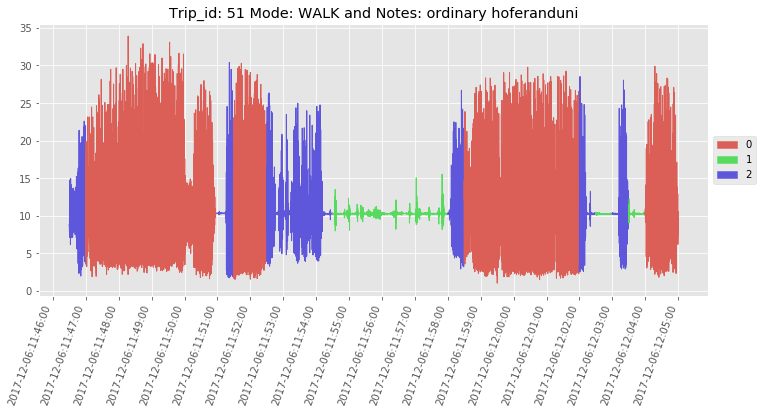

In [13]:
mode = trips_unpacked[selected_trip]["annotation"]["mode"][0]
notes = trips_unpacked[selected_trip]["annotation"]["notes"][0]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Trip_id: {} Mode: {} and Notes: {}".format(selected_trip, mode,notes))
plot_timeseries_clustering(acceleration_data_trip["time"],acceleration_data_trip["total"], acceleration_data_trip["cluster_labels"], ax=ax)

## Plot the distribution of modes to cluster label for all trips

From this we can see that it the clustering is not distinct between "WALK" and "TRAM"

In [14]:
def get_distribution_of_cluster_labels_for(target, distance_matrix):
    column_names = ["count_cluster_"+str(i) for i in np.sort(distance_matrix["cluster_labels"].unique())]
    column_names += [target]
    dist_df = pd.DataFrame(columns=column_names)
    # Collect cluster counts per mode
    for index, target_value in enumerate(distance_matrix[target].unique()):
        distance_per_target_value = distance_matrix[distance_matrix[target]==target_value]
        dist_df.loc[index,target]=target_value
        cluster_label_dist = distance_per_target_value.groupby("cluster_labels").count()[target]
        for cluster_id, label_count in cluster_label_dist.iteritems():
                dist_df.loc[index,"count_cluster_"+str(cluster_id)]=label_count

        dist_df.fillna(0,inplace=True)

    return dist_df

mode_dist_df = get_distribution_of_cluster_labels_for("mode", euclidean_distances)
mode_dist_df

,count_cluster_0,count_cluster_1,count_cluster_2,mode
0,0.0,434.0,10.0,METRO
1,422.0,76.0,191.0,WALK
2,0.0,573.0,6.0,TRAM


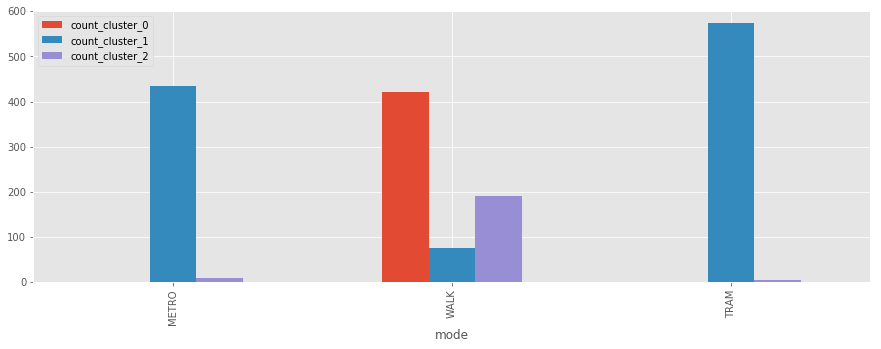

In [15]:
mode_dist_df.set_index("mode").plot(kind="bar",figsize=(15,5));

## Plot distribution of cluster labels for scripted and tokens

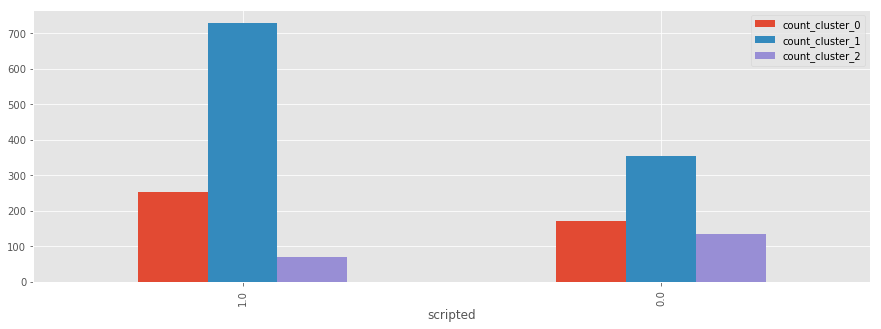

In [16]:
scripted_dist_df = get_distribution_of_cluster_labels_for("scripted", euclidean_distances)
scripted_dist_df.set_index("scripted").plot(kind="bar",figsize=(15,5));

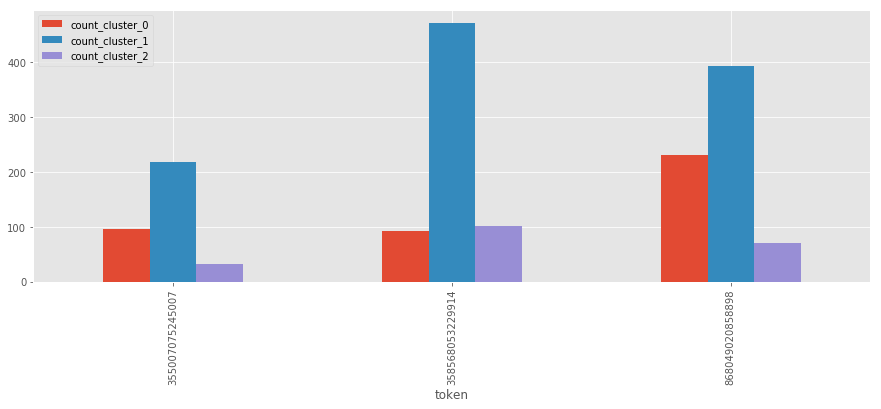

In [17]:
token_dist_df = get_distribution_of_cluster_labels_for("token", euclidean_distances)
token_dist_df.set_index("token").plot(kind="bar",figsize=(15,5));

## Plot all trips with their clustering labels

Produce this plot more conveniently by writing:

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


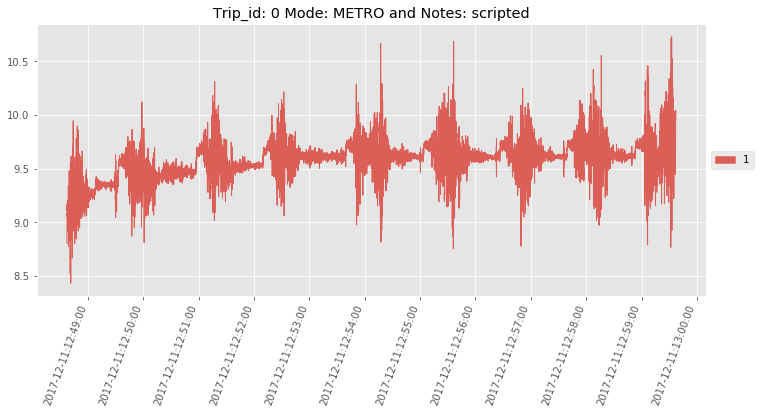

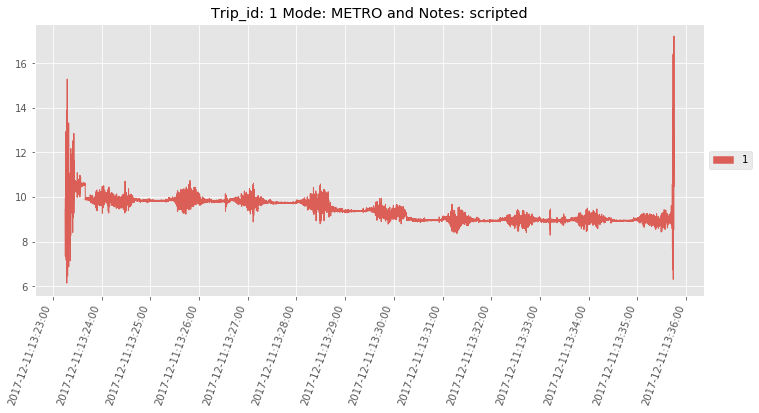

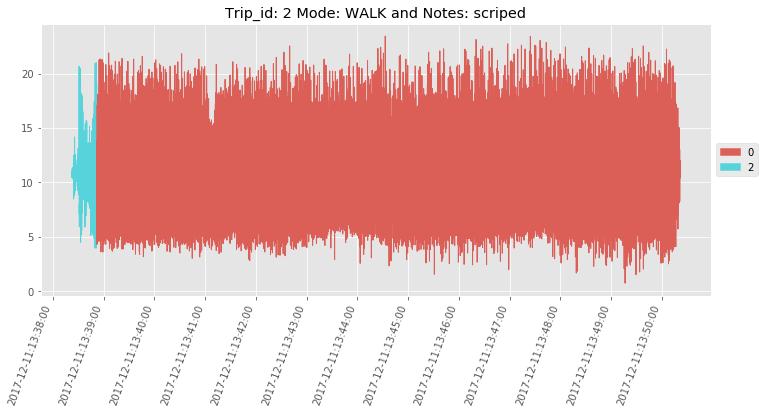

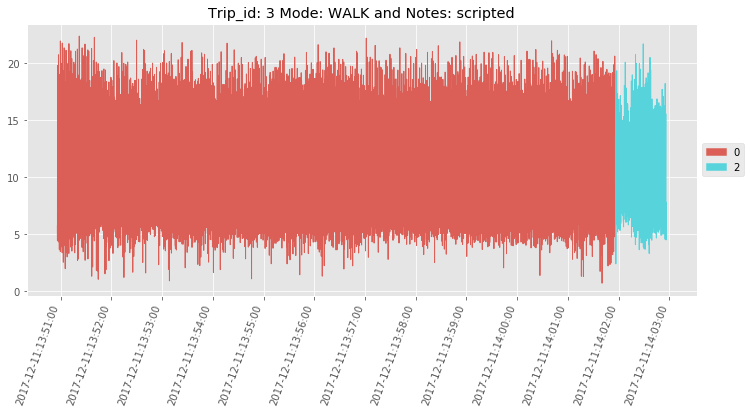

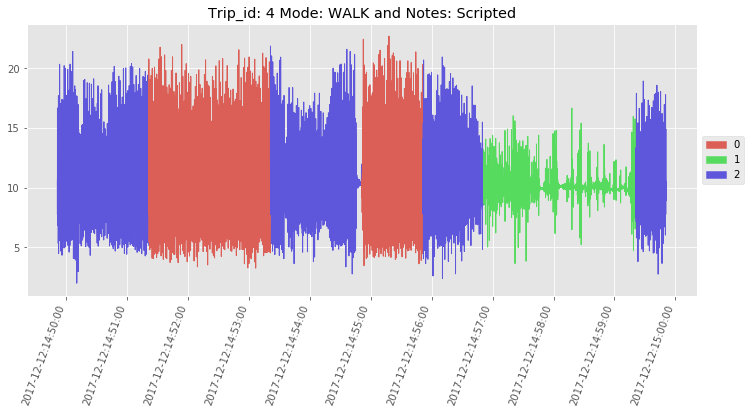

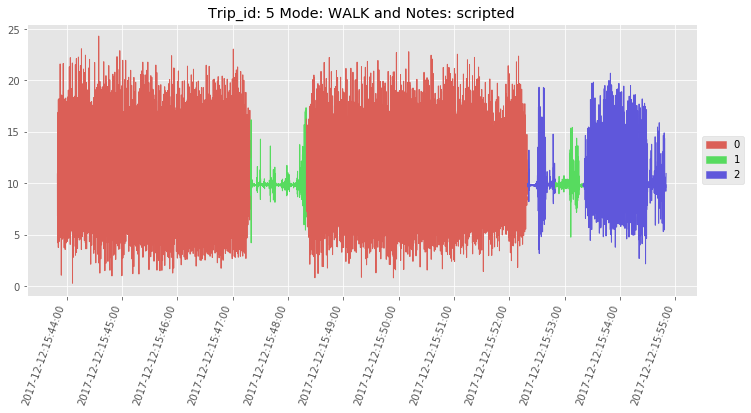

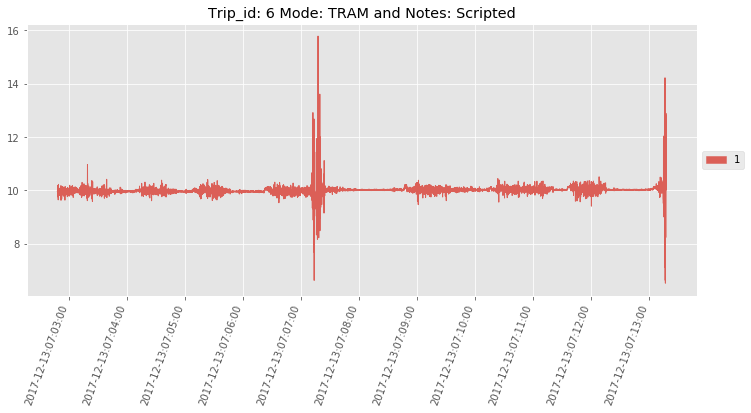

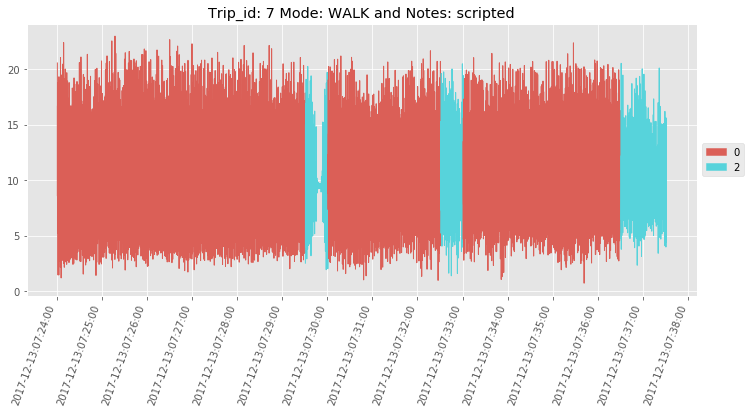

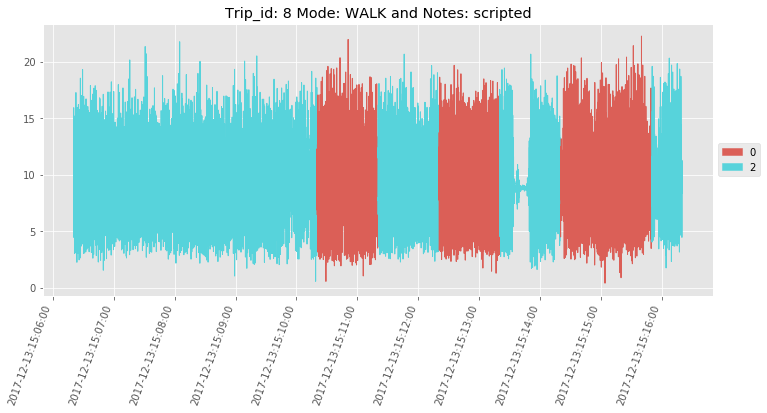

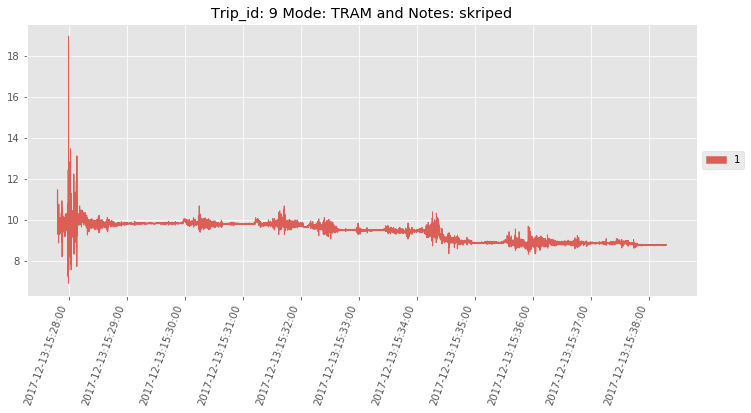

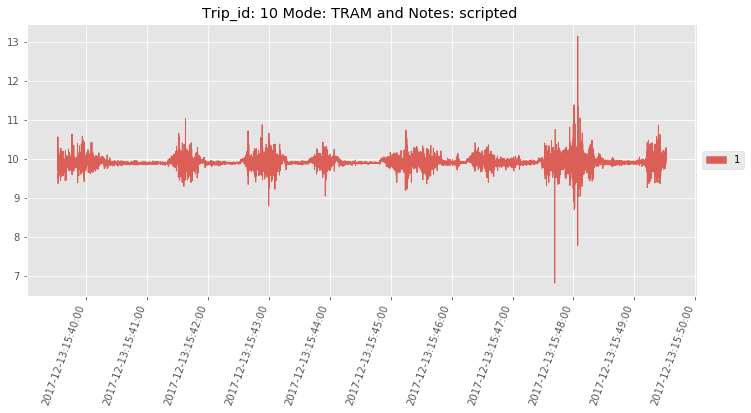

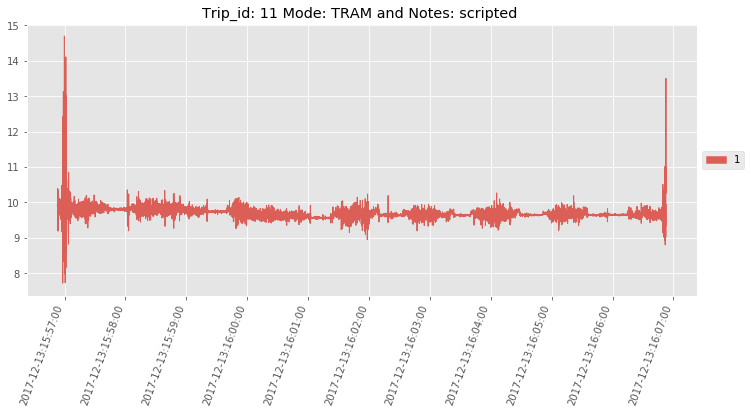

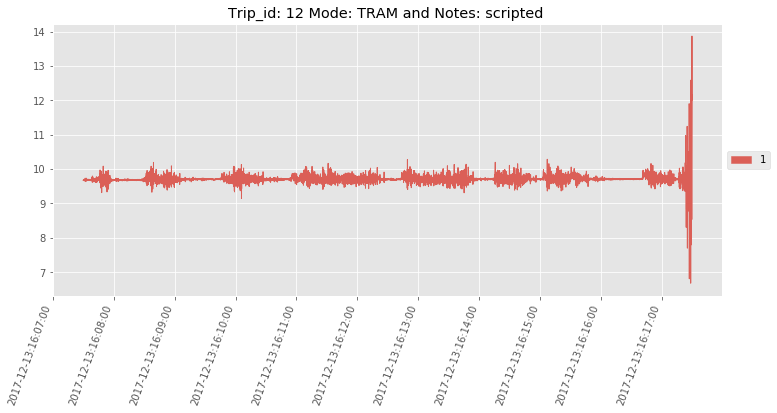

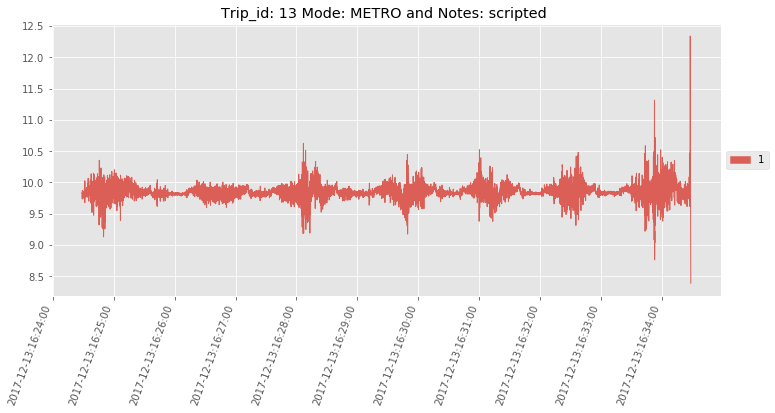

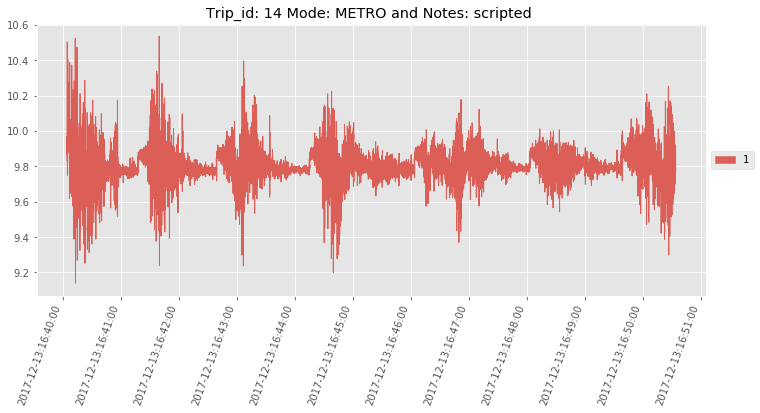

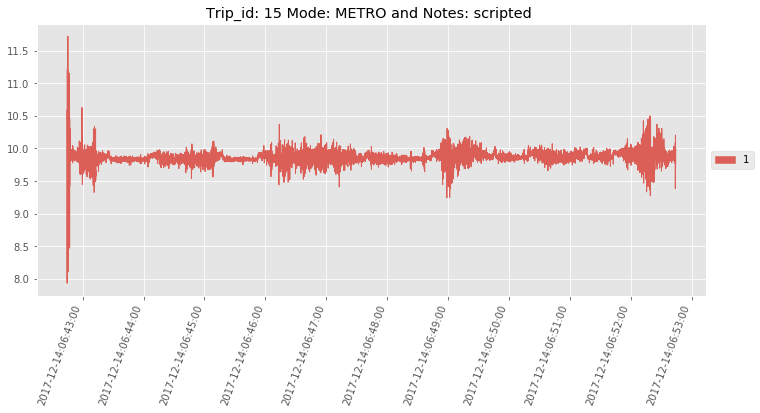

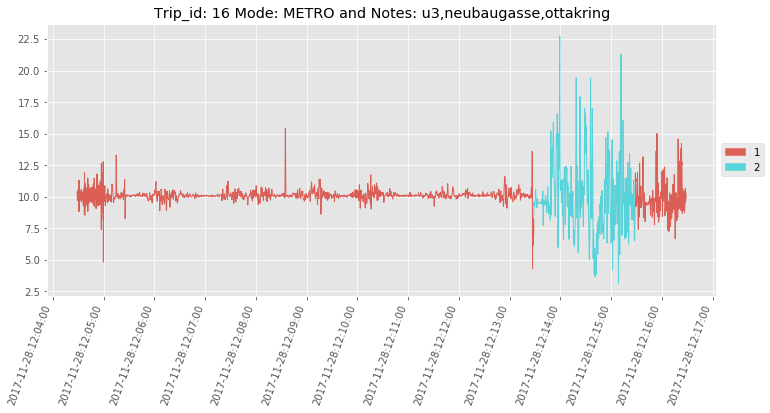

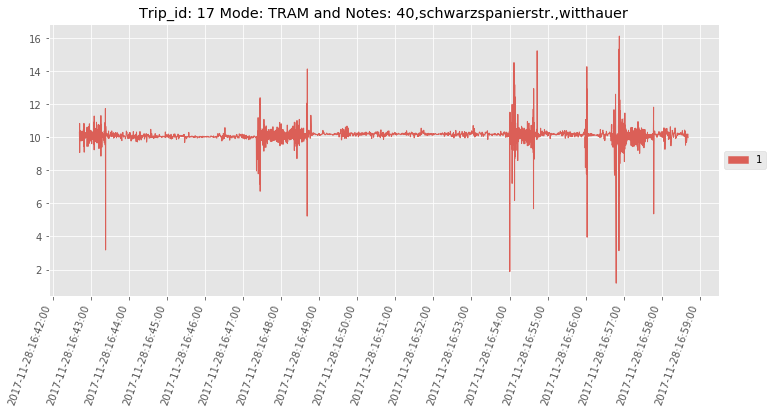

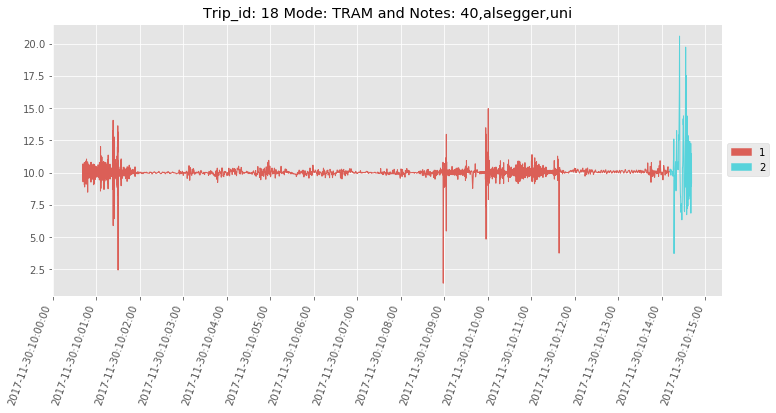

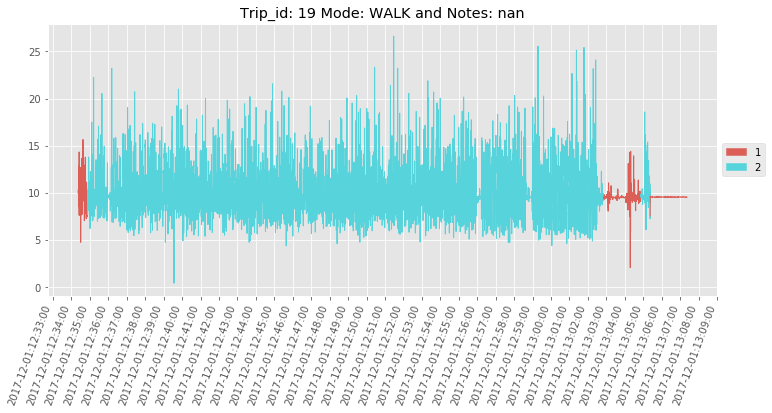

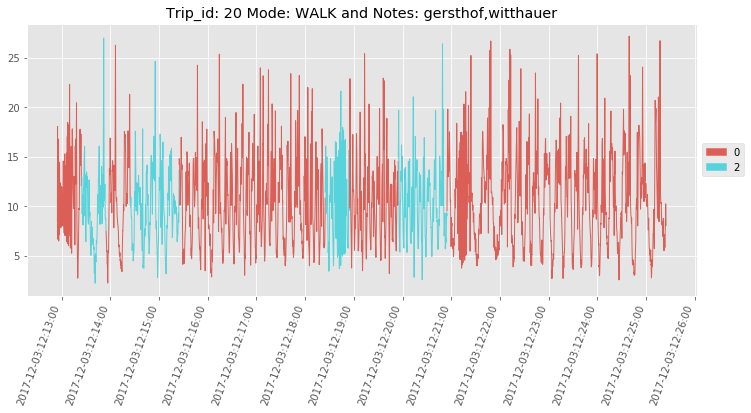

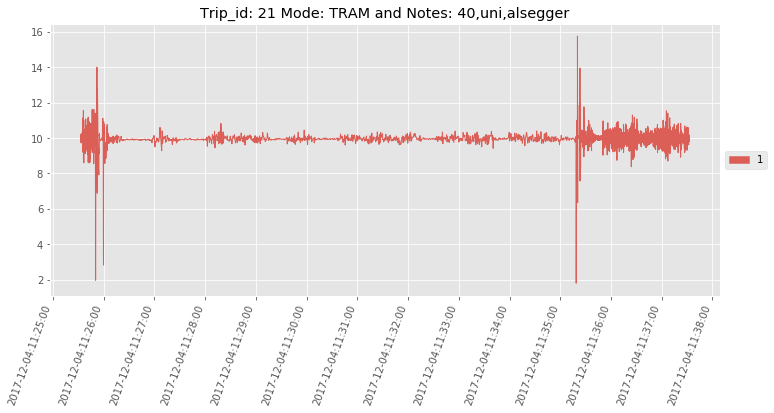

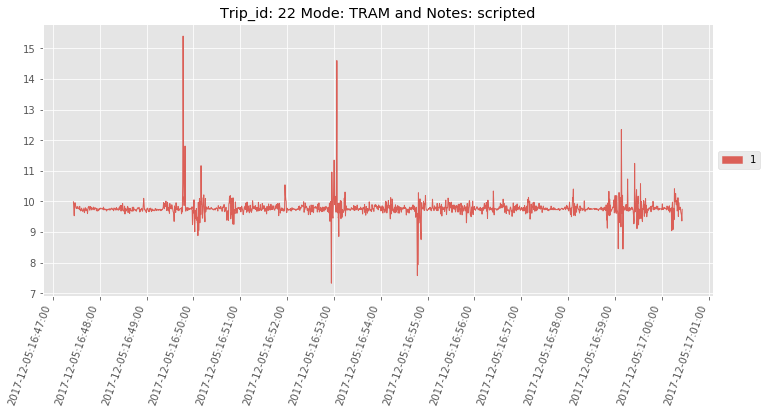

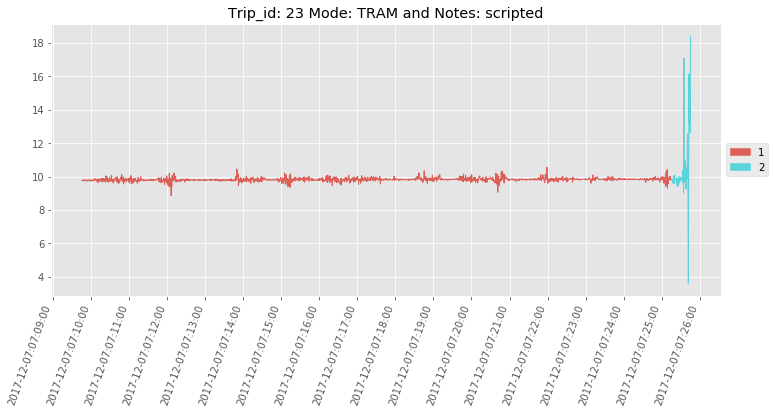

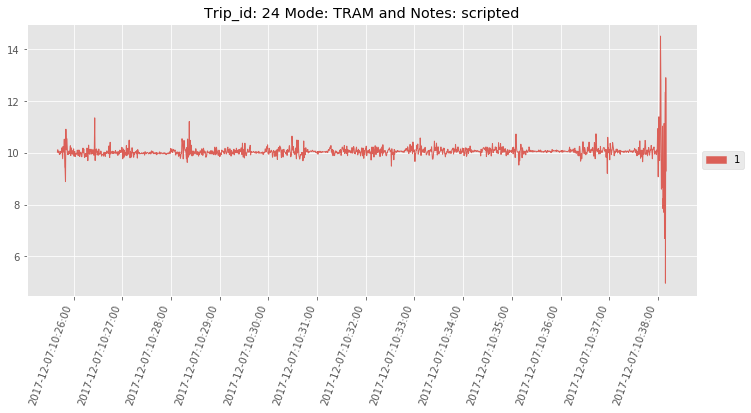

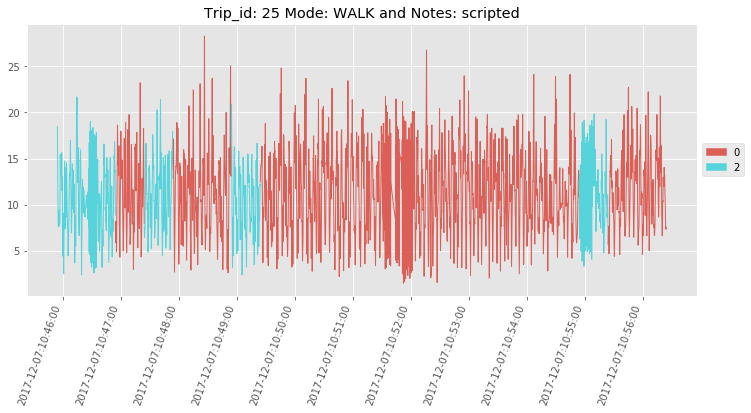

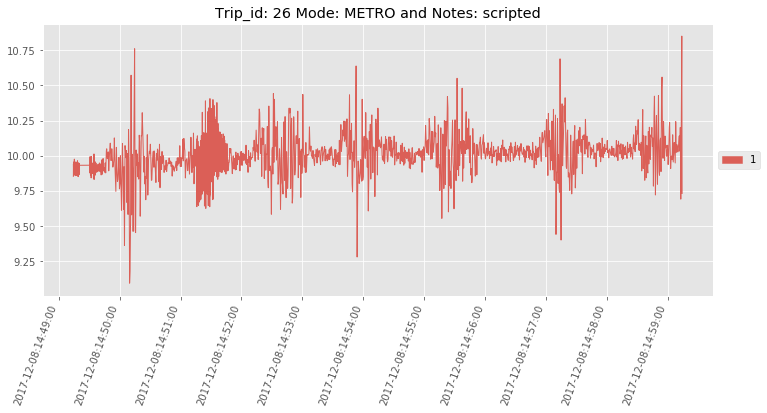

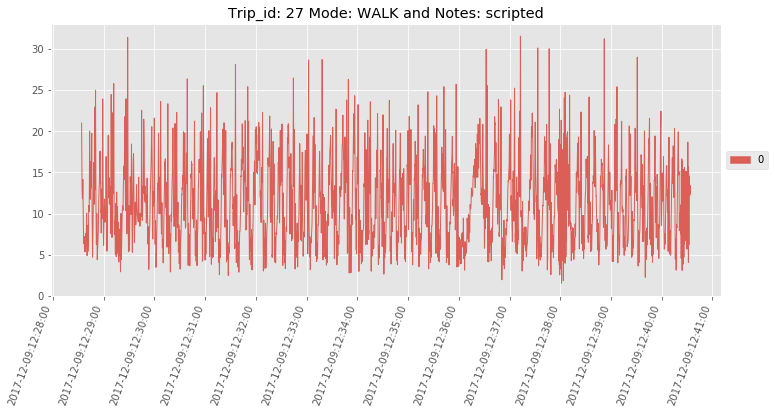

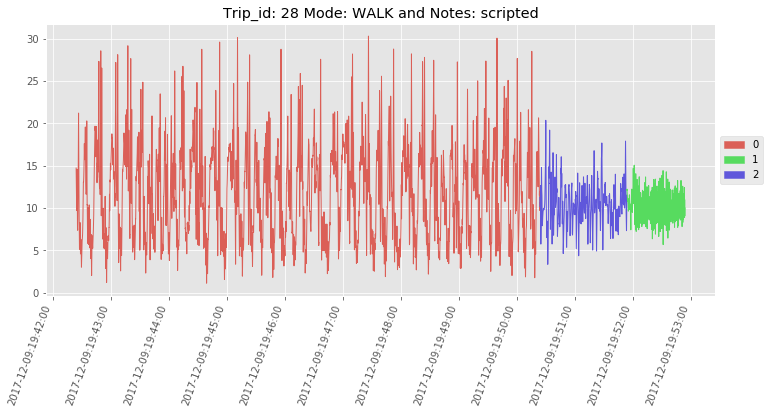

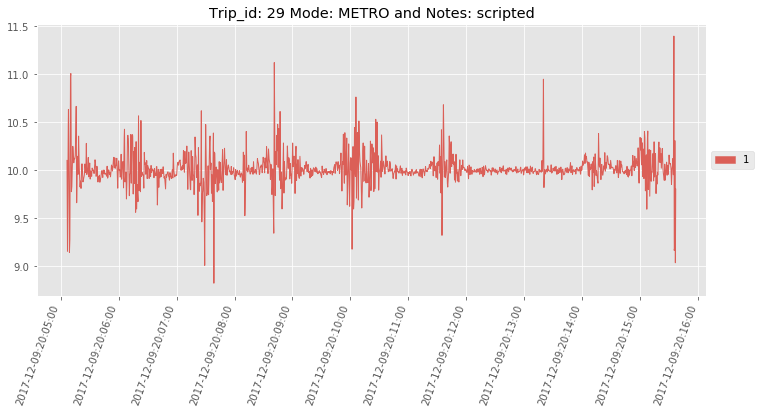

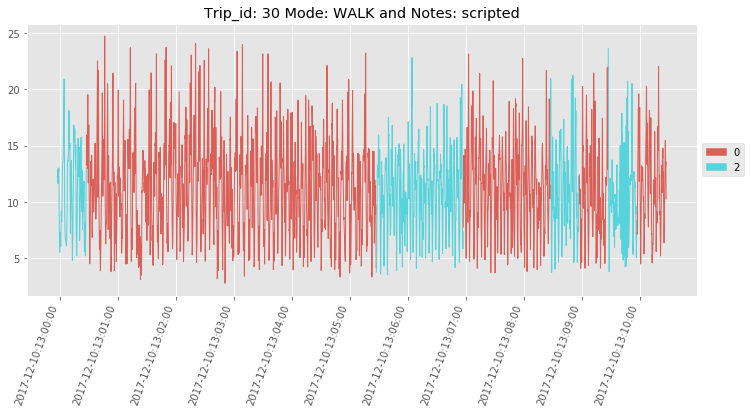

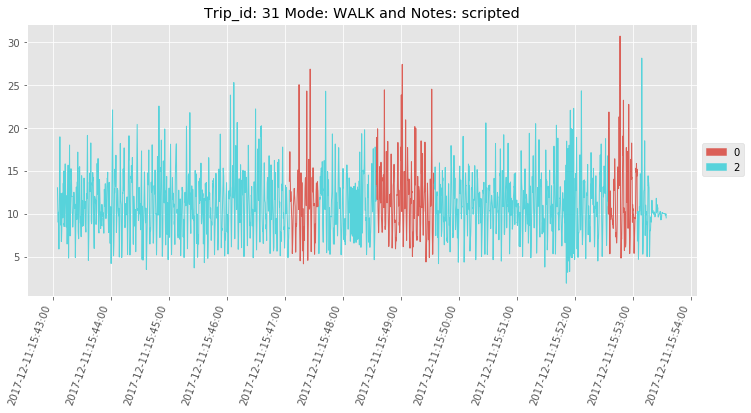

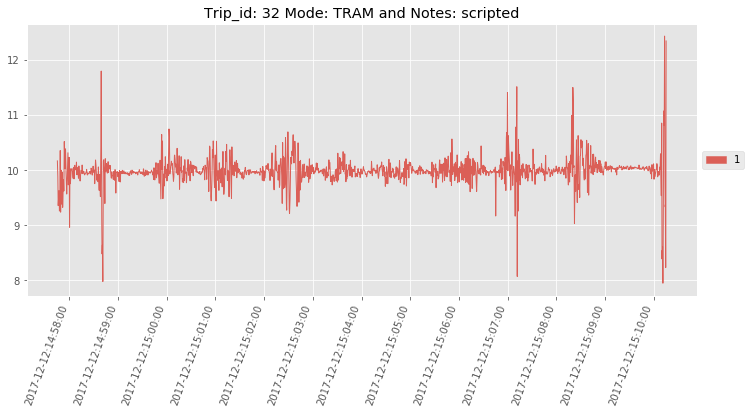

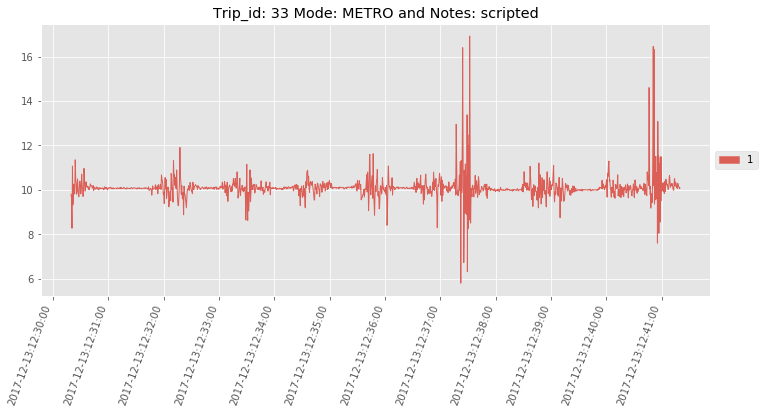

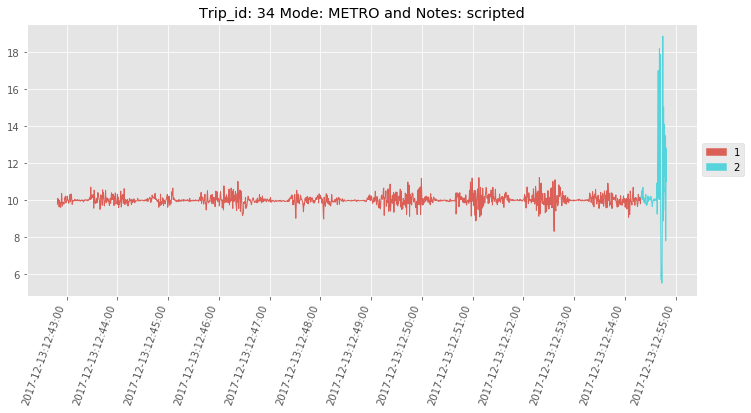

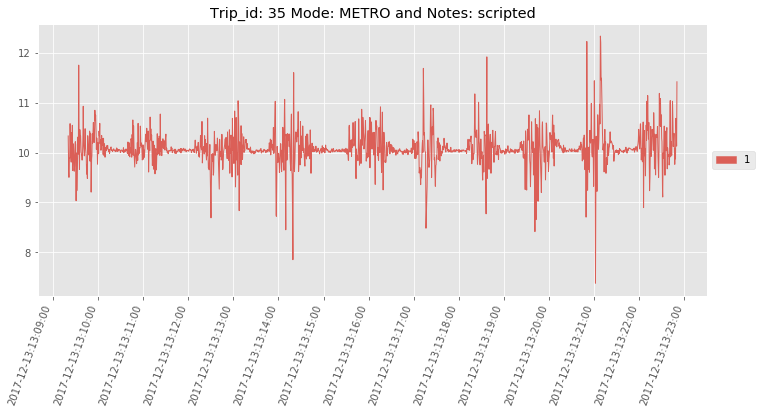

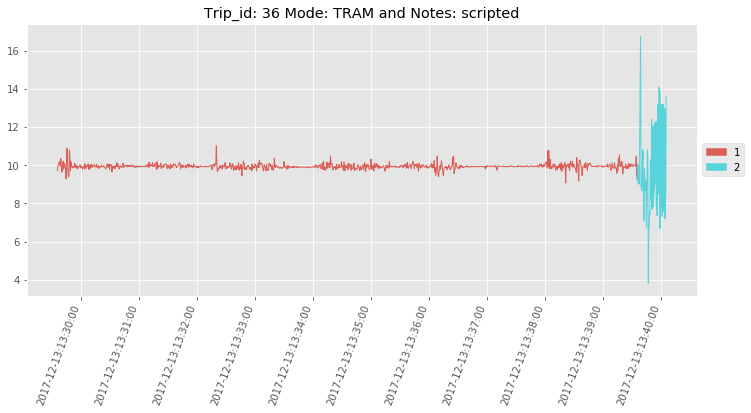

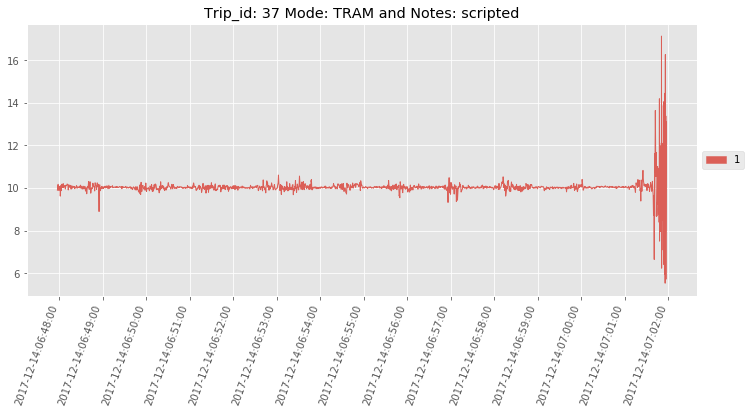

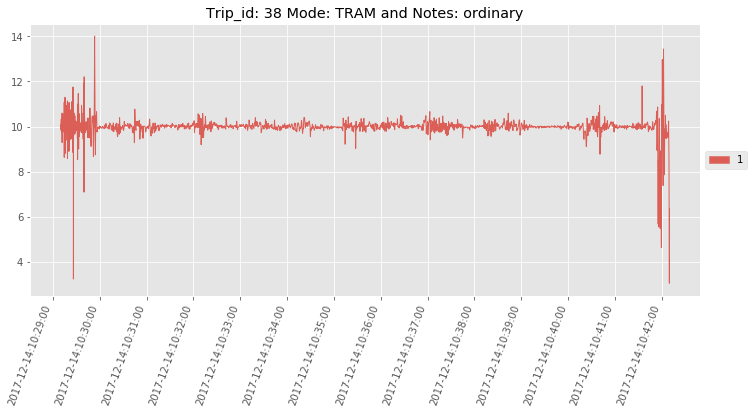

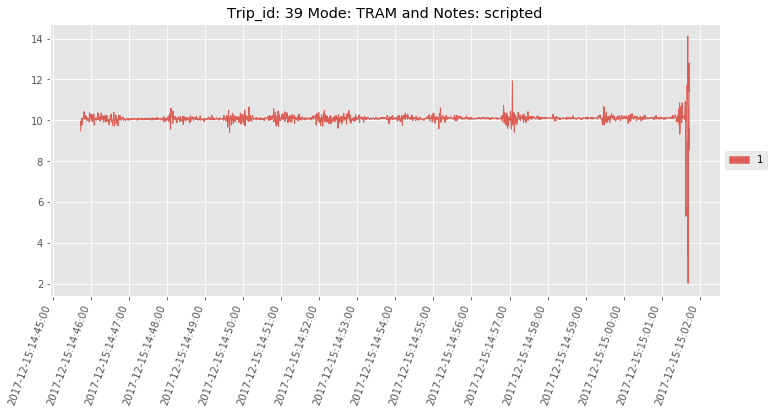

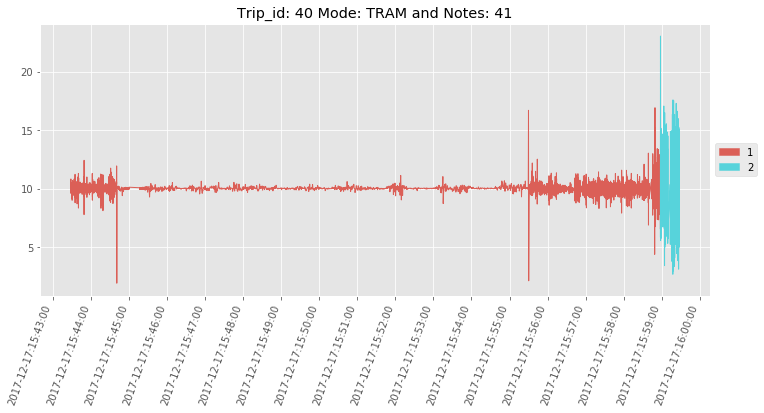

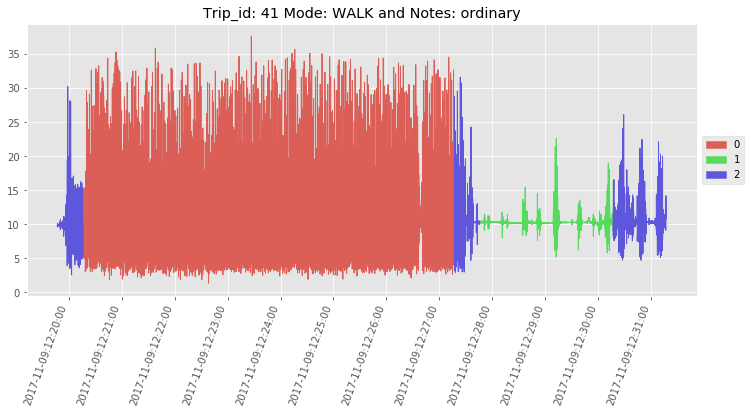

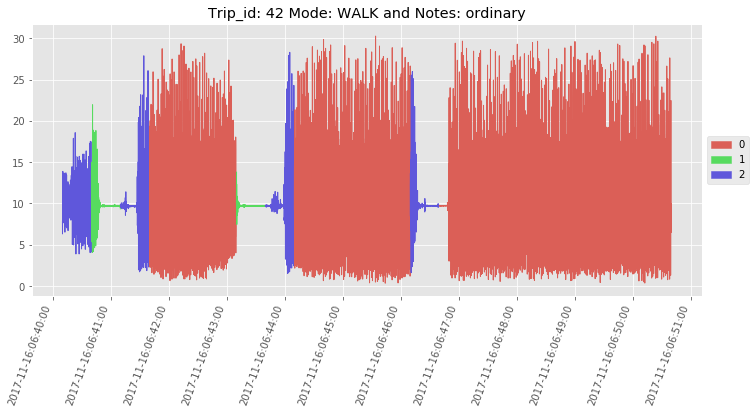

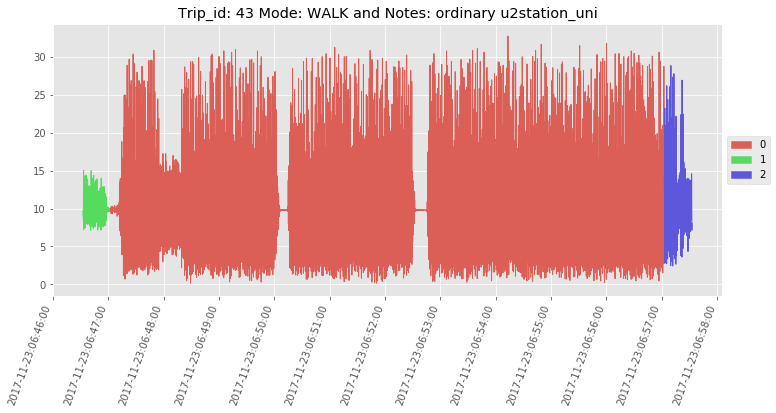

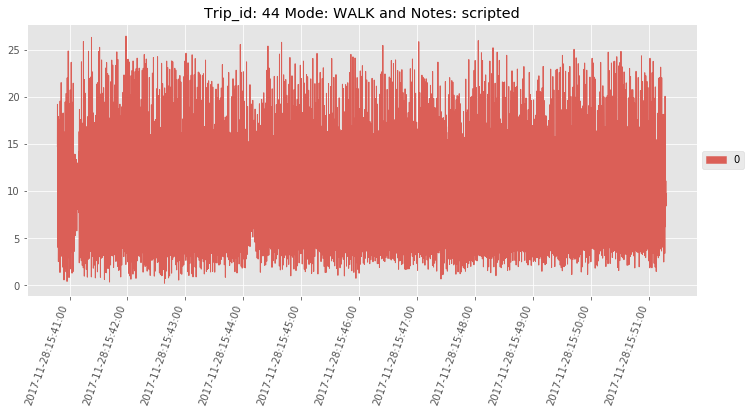

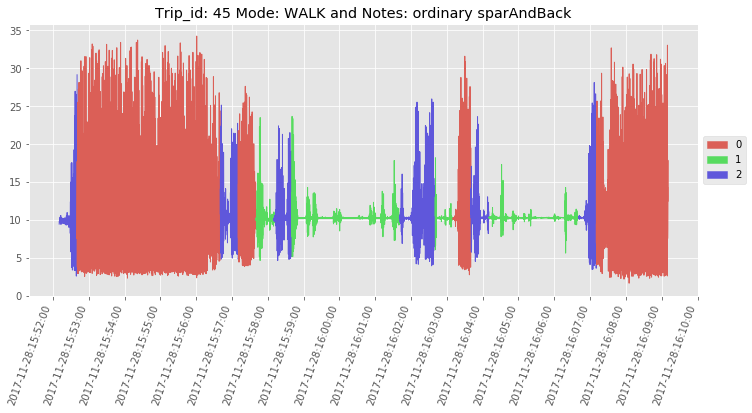

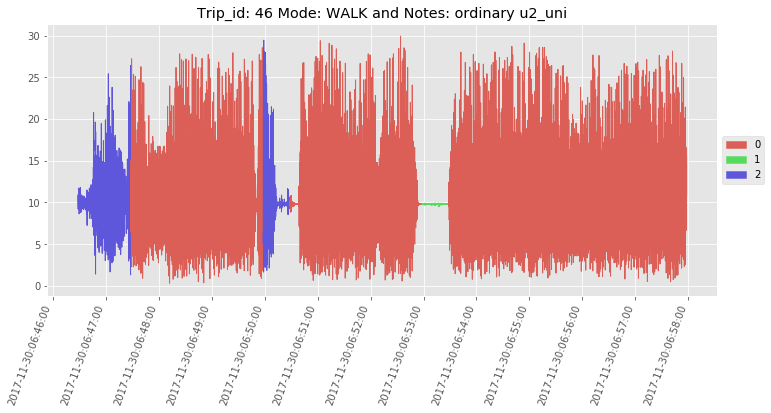

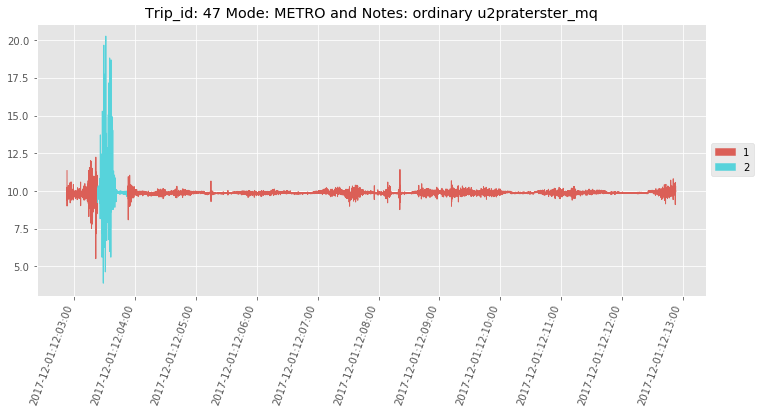

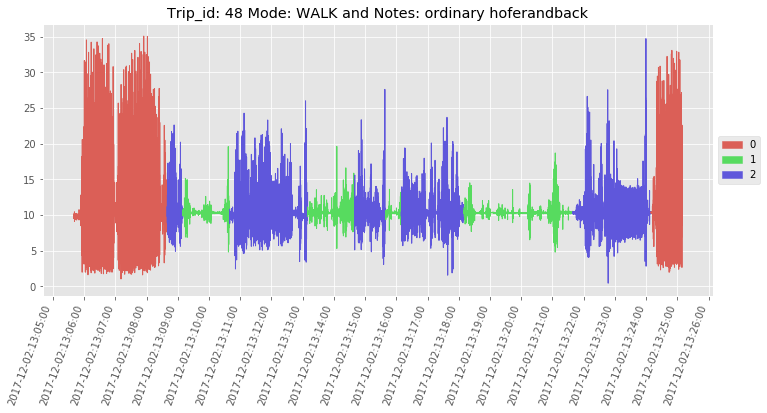

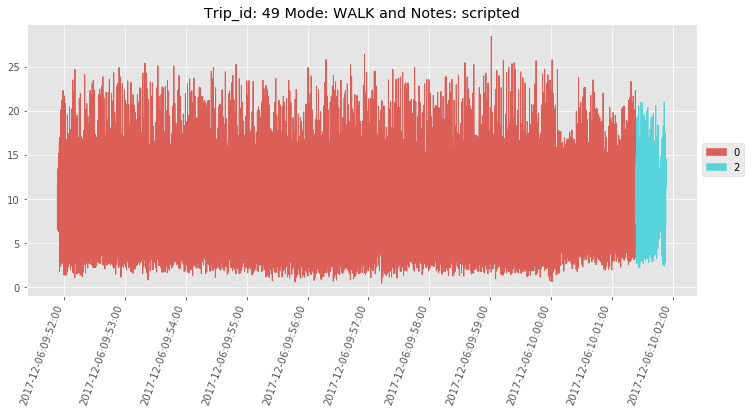

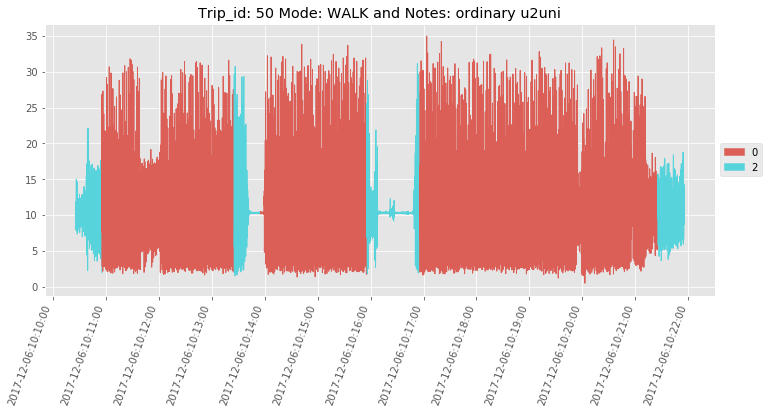

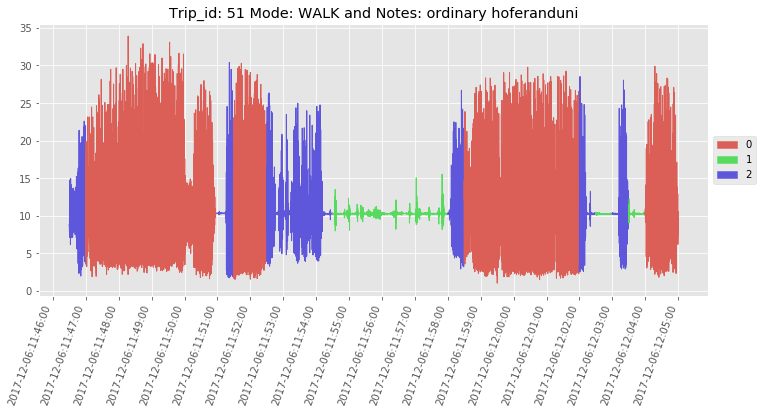

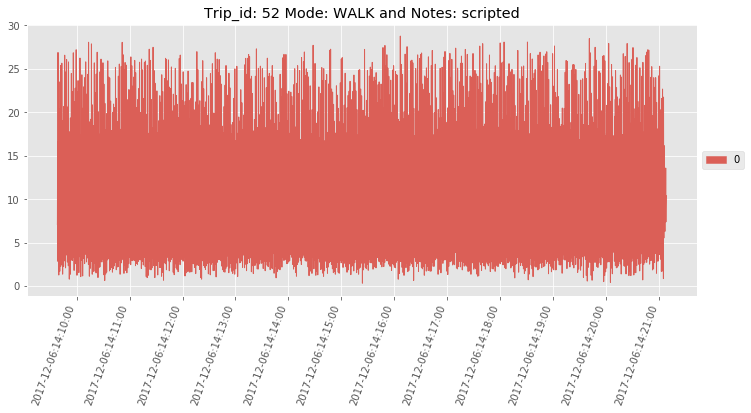

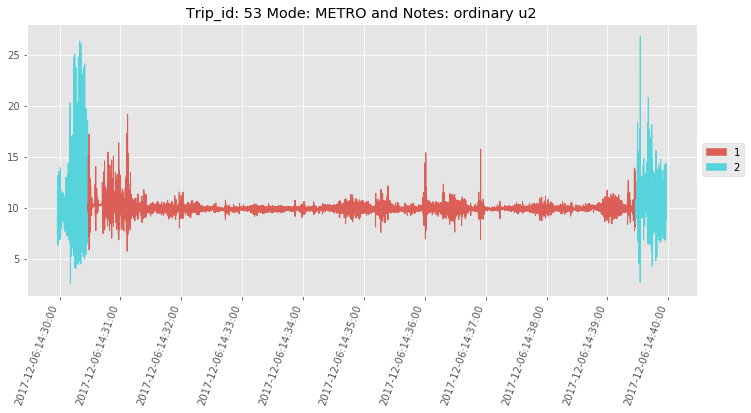

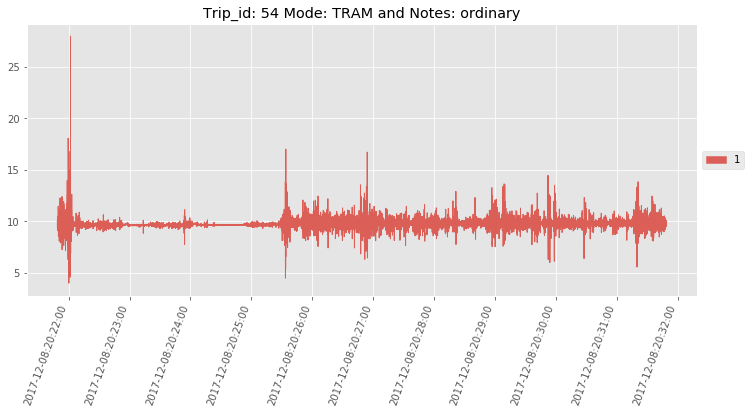

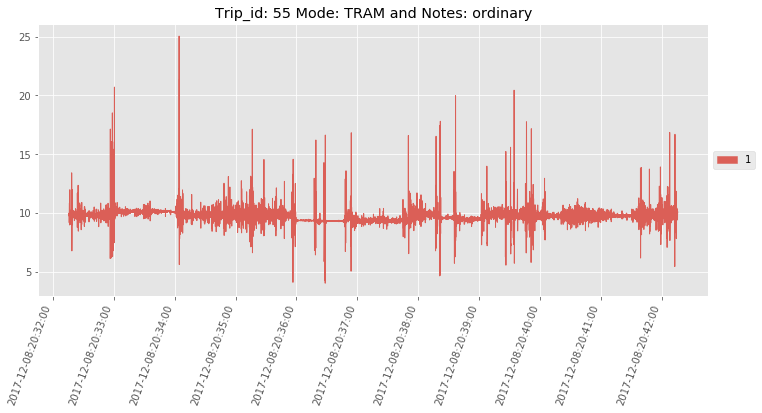

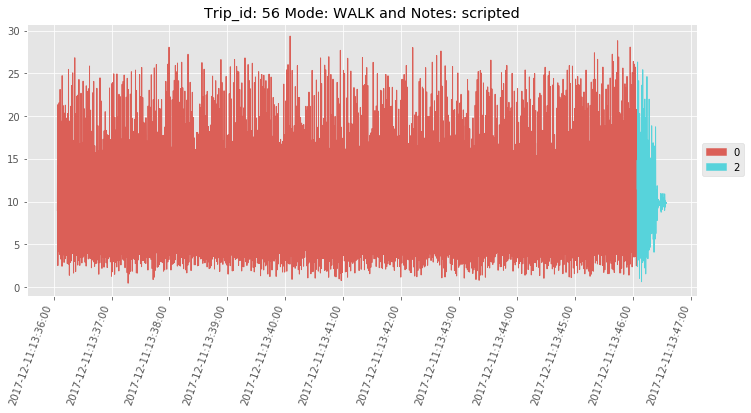

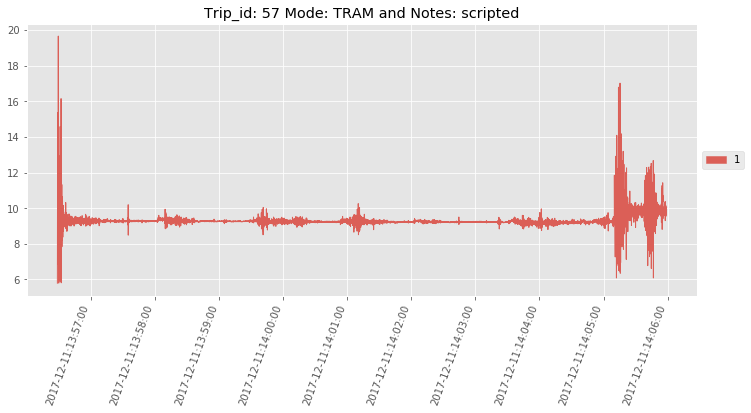

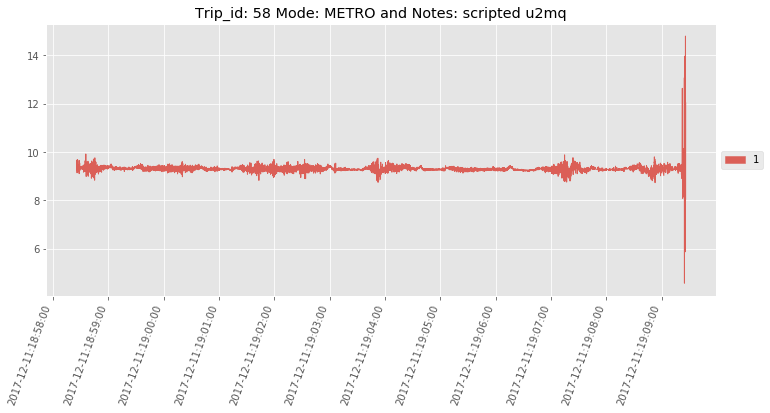

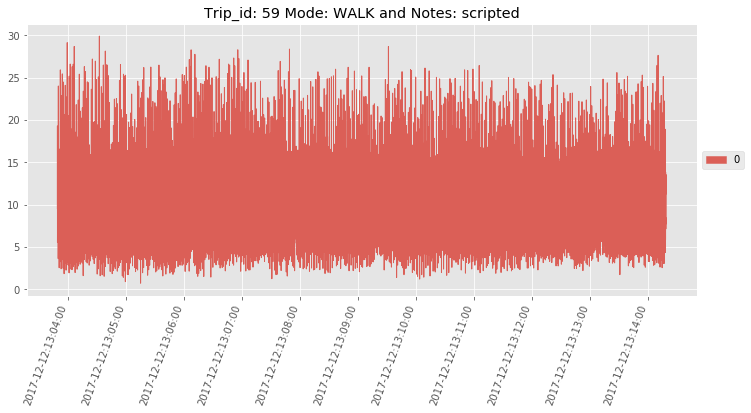

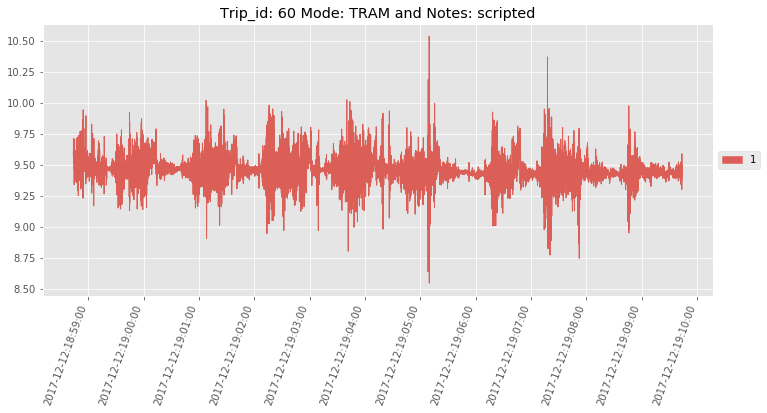

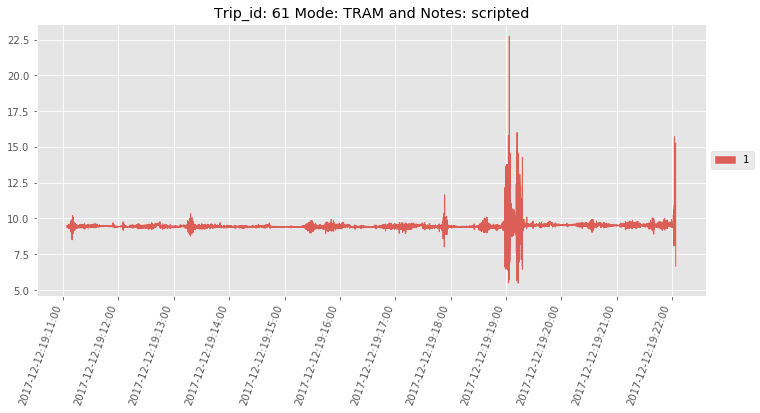

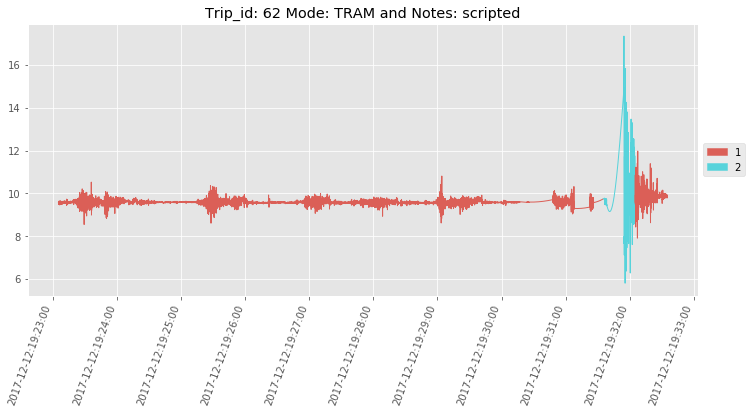

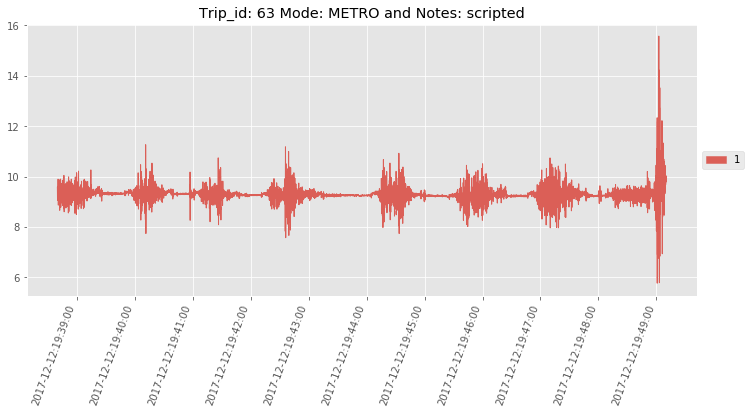

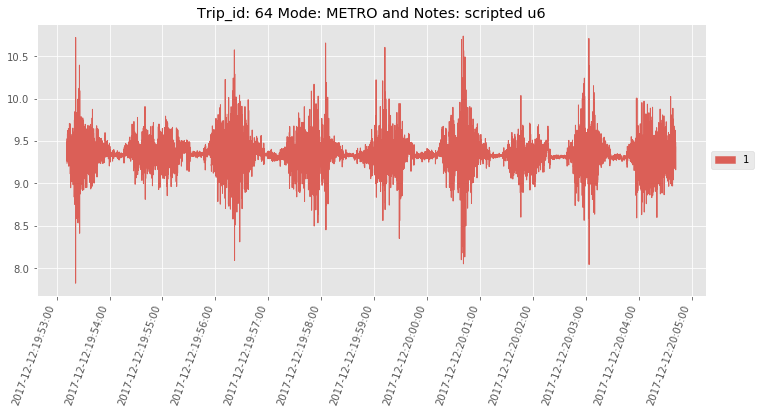

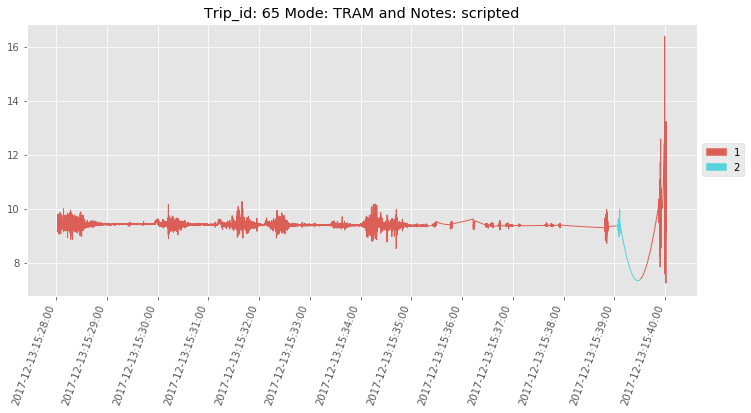

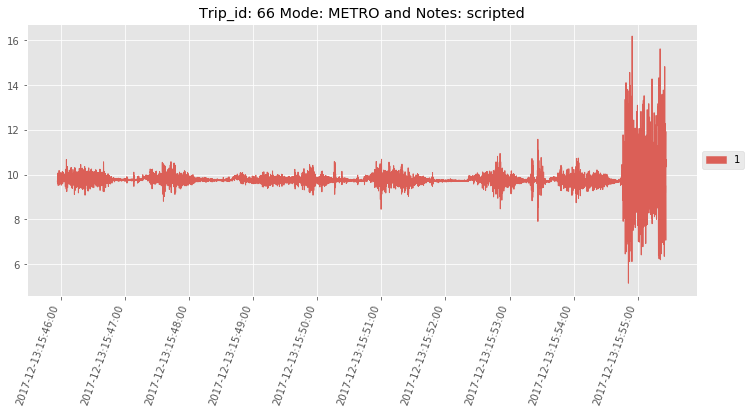

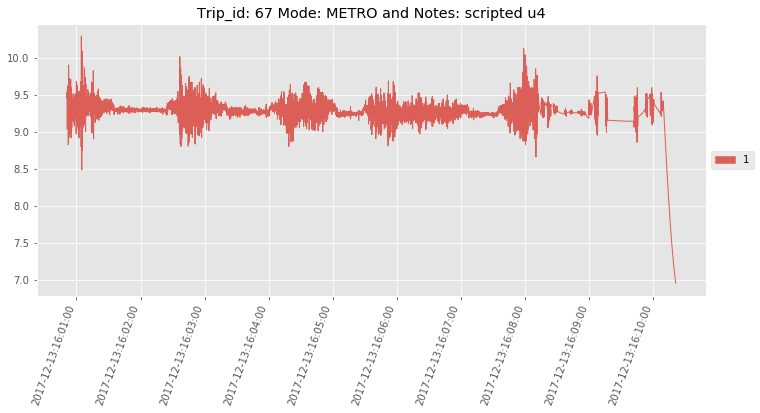

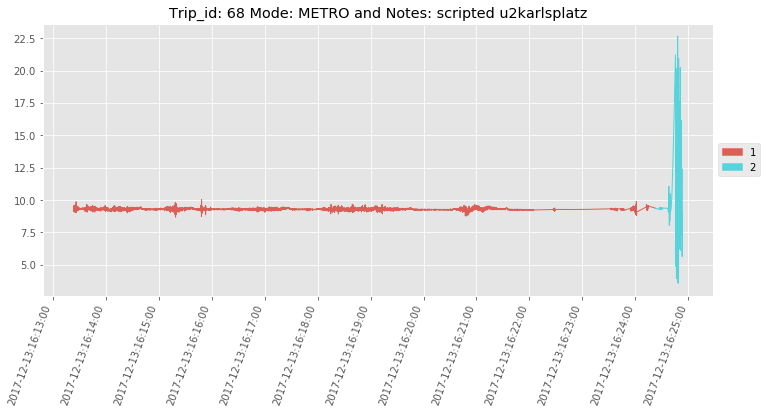

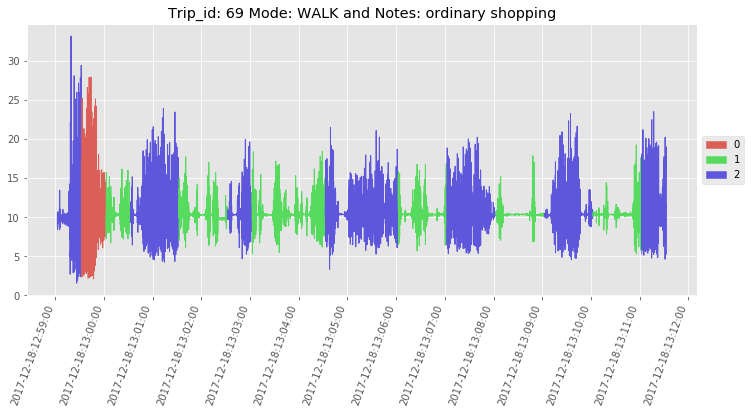

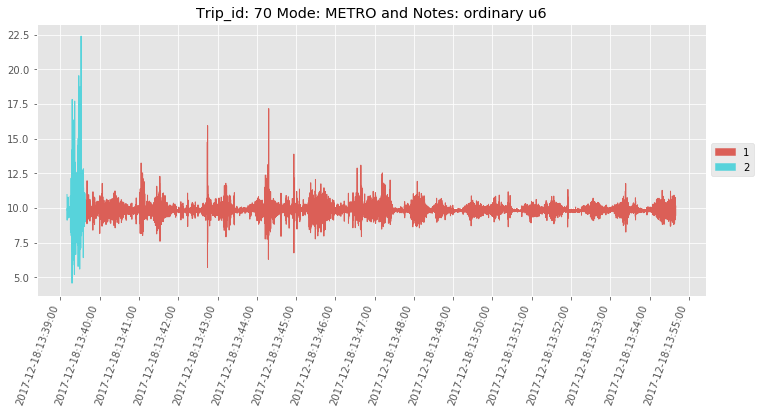

In [18]:

trip_ids = [i for i in euclidean_distances.trip_id.unique()]

for trip_id in trip_ids:
    time, total, labels = \
        get_plot_timeseries_clustering_variables(euclidean_distances,
                                                 trips_unpacked, 
                                                 trip_id, 
                                                 sensor_type="acceleration")


    mode = trips_unpacked[trip_id]["annotation"]["mode"][0]
    notes = trips_unpacked[trip_id]["annotation"]["notes"][0]

    title_format = "Trip_id: {} Mode: {} and Notes: {}"

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(title_format.format(trip_id,mode,notes))
    plot_timeseries_clustering(time,total, labels, ax=ax)